In [324]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt

In [493]:
SBA_Loan = pd.read_csv('SBA_Loan_test.csv')

In [494]:
DF_SBA_Loan = SBA_Loan.copy()
DF_SBA_Loan

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,Undefined
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,...,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0,Retail trade
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,...,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,Retail trade
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,...,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0,Manufacturing
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,...,Y,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,Undefined


In [495]:
#Keeping just the first 2 digits in the NAICS column of DF_SBA_Loan
DF_SBA_Loan[DF_SBA_Loan["NAICS"] == 0]
DF_SBA_Loan.drop(DF_SBA_Loan[DF_SBA_Loan["NAICS"] == 0].index, inplace=True)

In [496]:
a = [str(x) for x in np.array(DF_SBA_Loan["NAICS"])]
a = [s[:2] for s in a]
DF_SBA_Loan["NAICS"] = [int(x) for x in a]

In [497]:
DF_SBA_Loan = DF_SBA_Loan[['State', 'Bank', 'BankState', 'NAICS', 'ApprovalFY', 'NewExist', 'MIS_Status', 'SBA_Appv', 'GrAppv']] #'UrbanRural', 'LowDoc' left out
DF_SBA_Loan = DF_SBA_Loan.reset_index(drop=True)
DF_SBA_Loan

,State,Bank,BankState,NAICS,ApprovalFY,NewExist,MIS_Status,SBA_Appv,GrAppv
0,IN,FIFTH THIRD BANK,OH,45,1997,2.0,P I F,48000.0,60000.0
1,IN,1ST SOURCE BANK,IN,72,1997,2.0,P I F,32000.0,40000.0
2,IN,GRANT COUNTY STATE BANK,IN,62,1997,1.0,P I F,215250.0,287000.0
3,CT,"TD BANK, NATIONAL ASSOCIATION",DE,33,1997,1.0,P I F,387750.0,517000.0
4,FL,REGIONS BANK,AL,81,1997,2.0,P I F,36000.0,45000.0
...,...,...,...,...,...,...,...,...,...
697211,MD,BANK OF AMERICA NATL ASSOC,MD,33,1997,1.0,P I F,25000.0,50000.0
697212,CA,U.S. BANK NATIONAL ASSOCIATION,CA,31,1997,1.0,P I F,150000.0,200000.0
697213,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1.0,P I F,56000.0,70000.0
697214,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1.0,P I F,42500.0,85000.0


In [498]:
DF_SBA_Loan.drop(DF_SBA_Loan[DF_SBA_Loan['NewExist'] == 0].index, inplace=True)

In [499]:
# DF_SBA_Loan['UrbanRural'].value_counts()
# DF_SBA_Loan[DF_SBA_Loan['UrbanRural'] == 0]
# sns.countplot(x='UrbanRural', data=DF_SBA_Loan, hue='RevLineCr')
# DF_SBA_Loan['MIS_Status'].value_counts()

In [500]:
NAICS_BDS = pd.read_csv('NAICS_BDS_timeseries_data.csv', low_memory=False)
NAICS_BDS = NAICS_BDS.drop([0])

In [539]:
NAICS_BDS

,GEO_ID,NAME,NAICS,NAICS_LABEL,YEAR,FIRM,ESTAB,EMP,DENOM,ESTABS_ENTRY,...,JOB_DESTRUCTION_DEATHS,JOB_DESTRUCTION_CONTINUERS,JOB_DESTRUCTION_RATE_DEATHS,JOB_DESTRUCTION_RATE,NET_JOB_CREATION,NET_JOB_CREATION_RATE,REALLOCATION_RATE,FIRMDEATH_FIRMS,FIRMDEATH_ESTABS,FIRMDEATH_EMP
1,0100000US,United States,0,Total for all sectors,1978,3557994,4310626,69410001,66810001,654226,...,4048046,5420961,6.059,14.173,5196537,7.778,28.346,327278,332504,1824251
2,0100000US,United States,0,Total for all sectors,1979,3692077,4472108,73848234,71727111,630253,...,3760616,6043218,5.243,13.668,4248257,5.923,27.336,328024,332633,1785478
3,0100000US,United States,0,Total for all sectors,1980,3739809,4533251,74109267,74018218,592484,...,4246135,7797198,5.737,16.271,188937,0.255,32.542,368578,373754,1941422
4,0100000US,United States,0,Total for all sectors,1981,3770852,4615479,75728652,74924061,606853,...,3478843,7782399,4.643,15.03,1609104,2.148,30.06,377291,383748,2005707
5,0100000US,United States,0,Total for all sectors,1982,3720273,4598769,74922226,75267274,572030,...,4055239,8683755,5.388,16.925,-678350,-0.901,32.048,412488,418501,2211944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,0100000US,United States,81,Other services (except public administration),2015,627870,692521,5402143,5367556,54337,...,190691,389703,3.553,10.813,68593,1.278,21.626,34254,34772,117491
837,0100000US,United States,81,Other services (except public administration),2016,635866,701530,5495043,5443433,56964,...,183389,390994,3.369,10.552,102848,1.889,21.104,35133,35590,125535
838,0100000US,United States,81,Other services (except public administration),2017,639820,705522,5499089,5473326,56065,...,199943,435503,3.653,11.61,53589,0.979,23.22,37298,37944,138168
839,0100000US,United States,81,Other services (except public administration),2018,643774,708344,5590509,5547912,54528,...,192597,420088,3.472,11.044,86437,1.558,22.087,38866,39746,142311


In [501]:
NAICS_BDS.head()

,GEO_ID,NAME,NAICS,NAICS_LABEL,YEAR,FIRM,ESTAB,EMP,DENOM,ESTABS_ENTRY,...,JOB_DESTRUCTION_DEATHS,JOB_DESTRUCTION_CONTINUERS,JOB_DESTRUCTION_RATE_DEATHS,JOB_DESTRUCTION_RATE,NET_JOB_CREATION,NET_JOB_CREATION_RATE,REALLOCATION_RATE,FIRMDEATH_FIRMS,FIRMDEATH_ESTABS,FIRMDEATH_EMP
1,0100000US,United States,0,Total for all sectors,1978,3557994,4310626,69410001,66810001,654226,...,4048046,5420961,6.059,14.173,5196537,7.778,28.346,327278,332504,1824251
2,0100000US,United States,0,Total for all sectors,1979,3692077,4472108,73848234,71727111,630253,...,3760616,6043218,5.243,13.668,4248257,5.923,27.336,328024,332633,1785478
3,0100000US,United States,0,Total for all sectors,1980,3739809,4533251,74109267,74018218,592484,...,4246135,7797198,5.737,16.271,188937,0.255,32.542,368578,373754,1941422
4,0100000US,United States,0,Total for all sectors,1981,3770852,4615479,75728652,74924061,606853,...,3478843,7782399,4.643,15.03,1609104,2.148,30.06,377291,383748,2005707
5,0100000US,United States,0,Total for all sectors,1982,3720273,4598769,74922226,75267274,572030,...,4055239,8683755,5.388,16.925,-678350,-0.901,32.048,412488,418501,2211944


In [502]:
DF_NAICS = NAICS_BDS.copy()
DF_NAICS.drop(DF_NAICS[(DF_NAICS.NAICS == '00')].index, inplace=True)

In [503]:
DF_NAICS.isnull().sum()

GEO_ID                         0
NAME                           0
NAICS                          0
NAICS_LABEL                    0
YEAR                           0
FIRM                           0
ESTAB                          0
EMP                            0
DENOM                          0
ESTABS_ENTRY                   0
ESTABS_ENTRY_RATE              0
ESTABS_EXIT                    0
ESTABS_EXIT_RATE               0
JOB_CREATION                   0
JOB_CREATION_BIRTHS            0
JOB_CREATION_CONTINUERS        0
JOB_CREATION_RATE_BIRTHS       0
JOB_CREATION_RATE              0
JOB_DESTRUCTION                0
JOB_DESTRUCTION_DEATHS         0
JOB_DESTRUCTION_CONTINUERS     0
JOB_DESTRUCTION_RATE_DEATHS    0
JOB_DESTRUCTION_RATE           0
NET_JOB_CREATION               0
NET_JOB_CREATION_RATE          0
REALLOCATION_RATE              0
FIRMDEATH_FIRMS                0
FIRMDEATH_ESTABS               0
FIRMDEATH_EMP                  0
dtype: int64

In [504]:
DF_NAICS.drop(DF_NAICS[(DF_NAICS.NAICS == '31-33') | (DF_NAICS.NAICS == '44-45') | (DF_NAICS.NAICS == '48-49')].index, inplace=True)

In [505]:
DF_NAICS = DF_NAICS.append([NAICS_BDS[NAICS_BDS["NAICS"] == '31-33']]*3, ignore_index=True)
DF_NAICS = DF_NAICS.append([NAICS_BDS[NAICS_BDS["NAICS"] == '44-45']]*2, ignore_index=True)
DF_NAICS = DF_NAICS.append([NAICS_BDS[NAICS_BDS["NAICS"] == '48-49']]*2, ignore_index=True)

In [506]:
DF_NAICS

,GEO_ID,NAME,NAICS,NAICS_LABEL,YEAR,FIRM,ESTAB,EMP,DENOM,ESTABS_ENTRY,...,JOB_DESTRUCTION_DEATHS,JOB_DESTRUCTION_CONTINUERS,JOB_DESTRUCTION_RATE_DEATHS,JOB_DESTRUCTION_RATE,NET_JOB_CREATION,NET_JOB_CREATION_RATE,REALLOCATION_RATE,FIRMDEATH_FIRMS,FIRMDEATH_ESTABS,FIRMDEATH_EMP
0,0100000US,United States,0,Total for all sectors,1978,3557994,4310626,69410001,66810001,654226,...,4048046,5420961,6.059,14.173,5196537,7.778,28.346,327278,332504,1824251
1,0100000US,United States,0,Total for all sectors,1979,3692077,4472108,73848234,71727111,630253,...,3760616,6043218,5.243,13.668,4248257,5.923,27.336,328024,332633,1785478
2,0100000US,United States,0,Total for all sectors,1980,3739809,4533251,74109267,74018218,592484,...,4246135,7797198,5.737,16.271,188937,0.255,32.542,368578,373754,1941422
3,0100000US,United States,0,Total for all sectors,1981,3770852,4615479,75728652,74924061,606853,...,3478843,7782399,4.643,15.03,1609104,2.148,30.06,377291,383748,2005707
4,0100000US,United States,0,Total for all sectors,1982,3720273,4598769,74922226,75267274,572030,...,4055239,8683755,5.388,16.925,-678350,-0.901,32.048,412488,418501,2211944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0100000US,United States,48-49,Transportation and warehousing,2015,153822,202631,4591409,4499301,27612,...,171575,293097,3.813,10.328,184677,4.105,20.655,13968,14152,66039
1004,0100000US,United States,48-49,Transportation and warehousing,2016,156798,207273,4717118,4655107,26860,...,185955,301012,3.995,10.461,122484,2.631,20.922,15547,15803,107251
1005,0100000US,United States,48-49,Transportation and warehousing,2017,157752,208815,4853859,4781787,25053,...,165899,336049,3.469,10.497,148348,3.102,20.994,16484,16750,77042
1006,0100000US,United States,48-49,Transportation and warehousing,2018,162121,213126,5018707,4936647,26681,...,151173,323218,3.062,9.61,164146,3.325,19.219,16025,16271,80700


In [507]:
# DF_NAICS[DF_NAICS["NAICS"] == '31-33']
temp_array = [31]*42 + [32]*42 + [33]*42
temp_array
DF_NAICS = DF_NAICS.replace({'NAICS' : { '31-33' : temp_array}})
temp_array = [44]*42 + [45]*42
DF_NAICS = DF_NAICS.replace({'NAICS' : { '44-45' : temp_array}})
temp_array = [48]*42 + [49]*42
DF_NAICS = DF_NAICS.replace({'NAICS' : { '48-49' : temp_array}})

In [508]:
Keep_Columns_DF_NAICS = ['NAICS', 'YEAR', 'FIRM', 'DENOM', 'ESTABS_ENTRY', 'ESTABS_EXIT', 'JOB_CREATION', 'JOB_DESTRUCTION', 'REALLOCATION_RATE', 'FIRMDEATH_ESTABS', 'FIRMDEATH_EMP']
DF_NAICS = DF_NAICS[Keep_Columns_DF_NAICS]

In [509]:
To_int_Columns_DF_NAICS = ['NAICS', 'YEAR', 'FIRM', 'DENOM', 'ESTABS_ENTRY', 'ESTABS_EXIT', 'JOB_CREATION', 'JOB_DESTRUCTION', 'FIRMDEATH_ESTABS', 'FIRMDEATH_EMP']
for column_name in To_int_Columns_DF_NAICS:
    DF_NAICS[column_name] = [int(x) for x in DF_NAICS[column_name]]

DF_NAICS['REALLOCATION_RATE'] = [float(x) for x in DF_NAICS['REALLOCATION_RATE']]

In [510]:
# Merging Dataset based on NAICS category and dates: Year from DF_NAICS and ApprovalFY from DF_SBA_Loan
DF_SBA_Loan = DF_SBA_Loan.rename(columns={"ApprovalFY": "YEAR"})
print(DF_SBA_Loan.shape)
print(DF_NAICS.shape)

(696486, 9)
(1008, 11)


In [511]:
df_merged_NAICS_SBALoan = pd.merge(DF_SBA_Loan, DF_NAICS,  how='left', left_on=['NAICS','YEAR'], right_on = ['NAICS','YEAR'])
df_merged_NAICS_SBALoan

,State,Bank,BankState,NAICS,YEAR,NewExist,MIS_Status,SBA_Appv,GrAppv,FIRM,DENOM,ESTABS_ENTRY,ESTABS_EXIT,JOB_CREATION,JOB_DESTRUCTION,REALLOCATION_RATE,FIRMDEATH_ESTABS,FIRMDEATH_EMP
0,IN,FIFTH THIRD BANK,OH,45,1997,2.0,P I F,48000.0,60000.0,670945.0,13763872.0,110091.0,115364.0,2361731.0,2038489.0,29.621,73384.0,349798.0
1,IN,1ST SOURCE BANK,IN,72,1997,2.0,P I F,32000.0,40000.0,357519.0,9152783.0,69257.0,63282.0,1894562.0,1728105.0,37.761,45776.0,441164.0
2,IN,GRANT COUNTY STATE BANK,IN,62,1997,1.0,P I F,215250.0,287000.0,481657.0,12684590.0,60737.0,50485.0,1943403.0,1632957.0,25.747,35763.0,328510.0
3,CT,"TD BANK, NATIONAL ASSOCIATION",DE,33,1997,1.0,P I F,387750.0,517000.0,292577.0,16284152.0,28296.0,29516.0,1835979.0,1672272.0,20.539,22142.0,255029.0
4,FL,REGIONS BANK,AL,81,1997,2.0,P I F,36000.0,45000.0,599136.0,4864066.0,62099.0,58638.0,800963.0,694752.0,28.567,42290.0,156087.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696481,MD,BANK OF AMERICA NATL ASSOC,MD,33,1997,1.0,P I F,25000.0,50000.0,292577.0,16284152.0,28296.0,29516.0,1835979.0,1672272.0,20.539,22142.0,255029.0
696482,CA,U.S. BANK NATIONAL ASSOCIATION,CA,31,1997,1.0,P I F,150000.0,200000.0,292577.0,16284152.0,28296.0,29516.0,1835979.0,1672272.0,20.539,22142.0,255029.0
696483,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1.0,P I F,56000.0,70000.0,670945.0,13763872.0,110091.0,115364.0,2361731.0,2038489.0,29.621,73384.0,349798.0
696484,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1.0,P I F,42500.0,85000.0,670945.0,13763872.0,110091.0,115364.0,2361731.0,2038489.0,29.621,73384.0,349798.0


In [533]:
y_NAICS_SBA = df_merged_NAICS_SBALoan['SBA_Appv'] / df_merged_NAICS_SBALoan['GrAppv']
X_NAICS_SBA = df_merged_NAICS_SBALoan.drop(['SBA_Appv'], axis=1)

In [534]:
correlation = X_NAICS_SBA.corr()

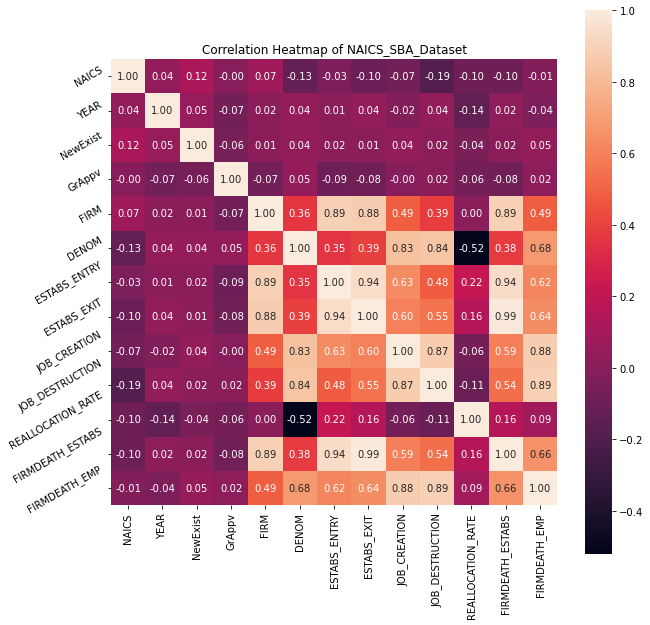

In [535]:
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap of NAICS_SBA_Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

In [536]:
P2_Columns = ['State', 'Bank', 'BankState', 'NAICS', 'YEAR', 'NewExist', 'MIS_Status',
       'GrAppv', 'FIRM', 'DENOM', 'ESTABS_EXIT',
       'JOB_DESTRUCTION', 'REALLOCATION_RATE',
       'FIRMDEATH_ESTABS', 'FIRMDEATH_EMP']

In [537]:
# Part:1 - Considering only Entering Entities to train our model
P1_Columns = ['State', 'Bank', 'BankState', 'NAICS', 'YEAR', 'NewExist', 'MIS_Status',
       'GrAppv', 'FIRM', 'DENOM', 'ESTABS_ENTRY',
       'JOB_CREATION']
X_NAICS_SBA_1 = X_NAICS_SBA[P1_Columns]

In [538]:
X_NAICS_SBA_1

,State,Bank,BankState,NAICS,YEAR,NewExist,MIS_Status,GrAppv,FIRM,DENOM,ESTABS_ENTRY,JOB_CREATION
0,IN,FIFTH THIRD BANK,OH,45,1997,2.0,P I F,60000.0,670945.0,13763872.0,110091.0,2361731.0
1,IN,1ST SOURCE BANK,IN,72,1997,2.0,P I F,40000.0,357519.0,9152783.0,69257.0,1894562.0
2,IN,GRANT COUNTY STATE BANK,IN,62,1997,1.0,P I F,287000.0,481657.0,12684590.0,60737.0,1943403.0
3,CT,"TD BANK, NATIONAL ASSOCIATION",DE,33,1997,1.0,P I F,517000.0,292577.0,16284152.0,28296.0,1835979.0
4,FL,REGIONS BANK,AL,81,1997,2.0,P I F,45000.0,599136.0,4864066.0,62099.0,800963.0
...,...,...,...,...,...,...,...,...,...,...,...,...
696481,MD,BANK OF AMERICA NATL ASSOC,MD,33,1997,1.0,P I F,50000.0,292577.0,16284152.0,28296.0,1835979.0
696482,CA,U.S. BANK NATIONAL ASSOCIATION,CA,31,1997,1.0,P I F,200000.0,292577.0,16284152.0,28296.0,1835979.0
696483,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1.0,P I F,70000.0,670945.0,13763872.0,110091.0,2361731.0
696484,OH,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997,1.0,P I F,85000.0,670945.0,13763872.0,110091.0,2361731.0
